In [1]:
%matplotlib inline 

In [3]:
import numpy as np
import scipy as sc
from matplotlib import pylab as plt

In [4]:
np.any? #checks documentation

<function matplotlib.pyplot.show>

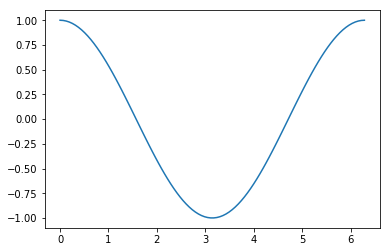

In [6]:
x=np.linspace(0,2*np.pi,100)
y=np.cos(x)
plt.plot(x, y)
plt.show

In [7]:
y.shape # in this case it tells us that it is an  100  array

(100,)

In [8]:
y.dot(y)

50.5

In [10]:
print (1/2)
print (1.45678479567456789/2) #Does not care about floating point

0.5
0.7283923978372839


In [11]:
x=0
while x<12:
    print(x)
    x+= 1

0
1
2
3
4
5
6
7
8
9
10
11


In [13]:
for x in range(10):
    print (x)

0
1
2
3
4
5
6
7
8
9


<function matplotlib.pyplot.show>

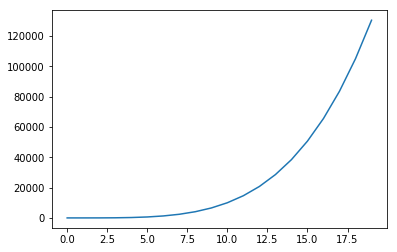

In [15]:
def f(x=1):
    y = x**4
    return y
x=np.asarray(range(20)) #make spaces on the x-axis
y=f(x)
plt.plot(x, y)
plt.show

In [16]:
print (f()) #AS DEFINED IN CELL 15

1


In [17]:
x.shape  #The returned value for the shape is a tuple. 
#It tells us that x is one-dimensional, and has 20 entries

(20,)

In [18]:
m = x.shape
print (m)
print (m[0])
#Remember the comma if you 
#want to define a tuple with only one entry!

(20,)
20


In [19]:
numbers = [1.,2.,3.,4.,5.] #Lists

In [21]:
numbers = np.asarray(numbers)#Convert to numpy array
print (numbers.dtype)

float64


In [22]:
numbers = np.asarray(numbers, dtype=int)#Convert to numpy array
print (numbers.dtype)

int64


In [23]:
numbers = [1.,2.,3.,4.,5.] #Lists

A list is different from a np.asarray

In [24]:
print (numbers+numbers)#plots the LIST twice
print (2*numbers)#plots the LIST twice

[1.0, 2.0, 3.0, 4.0, 5.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 1.0, 2.0, 3.0, 4.0, 5.0]


Now we look at slicing:

In [26]:
print (numbers[:2]) # print the first two entries.
print (numbers[2:4]) #Here you need to remember that indexing starts at 0.
print (numbers[3:]) # Print from the 3rd index until the end.
print (numbers[3:]) # Print from the 3rd index until the end.
print (numbers[-1]) # Print the last entry.
print (numbers[-2]) # Print the second last entry.

[1.0, 2.0]
[3.0, 4.0]
[4.0, 5.0]
[4.0, 5.0]
5.0
4.0


In [ ]:
print (len(numbers)) #number of elements in the array

In [27]:
numbers.append(10.) # Add 10 to the end of the list.
print (numbers)

[1.0, 2.0, 3.0, 4.0, 5.0, 10.0]


Dictionaries and key-value pairs

In [33]:
people ={'Bob' : {'age' : 40 ,'phone' : '021'}, 'Ted' : {'age' : 50,'phone' : '012'}, 'Alice' : {'age' : 29, 'phone' : '051'}}
people['Bob']

{'age': 40, 'phone': '021'}

In [34]:
people['Ted']['age']

50

In [35]:
people.keys() #to see whats in an unknown list

dict_keys(['Alice', 'Bob', 'Ted'])

In [36]:
people['Ben'] = {'age': 100,'phone':'082'}   # Adding a new entry into the dictionary
people.keys() #order doesnt matter in a dictionary

dict_keys(['Alice', 'Bob', 'Ben', 'Ted'])

### NUMPY

In [37]:
A = np.array([[1.,2.,3.],[1,1,1]]) 
print (A)
print (A.shape)

[[1. 2. 3.]
 [1. 1. 1.]]
(2, 3)


In [38]:
print (A.T)  # Easy way to get the transpose

[[1. 1.]
 [2. 1.]
 [3. 1.]]


Matrix multiplication.
First define a vector  x , we want to calculate the product  AxAx . This is done using the Numpy function, dot.

Note:
Matrix multiplication  ABAB  consists of taking the dot products between the rows of  AA  and the columns of  BB .

In [41]:
x=np.array([[1],[1],[1]])
A.dot(x)

array([[6.],
       [3.]])

In [42]:
B = np.array([[1,1],[1,2],[2,2]])
A.dot(B)

array([[ 9., 11.],
       [ 4.,  5.]])

### Be aware:
There is one peculiarity that trips people up all the time. Look at the following example.

In [43]:
x = np.array([1,2,1])
print (x.shape)

(3,)


In [44]:
print (x)

[1 2 1]


In [45]:
print (x.T)#At first, this
#may look like a row vector. Let's try and take its transpose:

[1 2 1]


**Nothing happened!** 
This is because $x$ is not a (2-dimensional) matrix, but a 1-dimensional array more akin to a list. Such a structure does not have a notion of a "row" or a "column" vector, so transposition does not work as expected.

**There are different ways of fixing it.**

In [46]:
y = np.array([[1, 2, 1]])  # Define it to have two dimensions
print (y.shape)
print (y)

(1, 3)
[[1 2 1]]


In [47]:
print (y.T.shape)  # This is a column vector.

(3, 1)


**Adding an axis**

The following is the preferred way to add an axis.

Note that one can add it in two different ways.

In [48]:
y = x[:,np.newaxis]
print ('y = ',y)

z = x[np.newaxis,:]
print ('z = ',z)

y =  [[1]
 [2]
 [1]]
z =  [[1 2 1]]


### Broadcasting
This is an advanced topic but you should be aware that numpy tries to understand what you want to do (in a well-defined way), even if you are not strictly mathematically correct. A good introduction to broadcasting is at http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

Since it is such a useful device, we'll spend some time on it, although probably not something one would normally include in a first introduction.

**Note:**
* Broadcasting allows one to write very concise, unreadable code. Use with care!

**Example:**

Let us start with a simple example. Earlier we defined a matrix $A$:

In [9]:
A = np.array([[1.,2.,3.],[1,1,1]]) 
print(A)

[[1. 2. 3.]
 [1. 1. 1.]]


In [10]:
print(A.shape)

(2, 3)


Command mode vs. Edit mode
But first…something key to be aware of: Jupyter Notebooks have two different keyboard input modes:

Command mode - binds the keyboard to notebook level actions. Indicated by a grey cell border with a blue left margin.

Edit mode - when you’re typing in a cell. Indicated by a green cell border

In [11]:
print(A.T)#print the transpose

[[1. 1.]
 [2. 1.]
 [3. 1.]]


In [12]:
print (A + np.ones(A.shape))#add one to each matrix element

[[2. 3. 4.]
 [2. 2. 2.]]


In [13]:
print(A+1)#or by doing this (done via broadcasting).broadcasts 
#the scalar  1  to an array of the 
#correct dimensions so that matrix addition is defined

[[2. 3. 4.]
 [2. 2. 2.]]


Mathematically $A+1$ makes no sense, but numpy understands what you want to do and broadcasts the scalar $1$ to an array of the correct dimensions so that matrix addition is defined.

**In general**

How does broadcasting work in general? Before we answer this question, it is useful to recall that the $+$ and $*$ operators in numpy both perform pointwise operations. This means we can illustrate all the ideas behind broadcasting using $+$. As a reminder: In order to do matrix multiplication one uses the `dot` method.

How does broadcasting work if one wants to add two general multidimensional arrays? It is easy if they have the same dimensions, but for broadcasting they need not have the same dimensions or even the same number of dimensions.

The rule for broadcasting is the following: 

One starts at the back of the two arrays  and compare their dimensions element wise. The two dimensions are compatible, if

1. The two dimensions are the same
2. One of the two dimensions is 1. 

A few examples will make this clear.

**Example 1**

```
A (2D array): 4 x 1
B (1D array):     3
Result:       4 x 3 array
```
Since $A$ is a column vector, its column is repeated 3 times resulting in an $4\times 3$ array with identical columns. Then the  1D array $B$ is expanded into an $4\times 3$ array where every *row* of the expanded $B$ is a copy of the original $B$. 

In reality numpy does not really do the expanding explicitly; it would be wasteful. But that is the idea. 



In [4]:
A= np.array([1,1,1,1])
A= A[:,np.newaxis]
B=np.array([1,2,3])
print(A)
print(B)

[[1]
 [1]
 [1]
 [1]]
[1 2 3]


In [5]:
print('A:', A.shape)
print('B:', B.shape)
print ('A+B:',(A+B).shape)

A: (4, 1)
B: (3,)
A+B: (4, 3)


In [18]:
print(A+B) #automatic broadcasting

[[2 3 4]
 [2 3 4]
 [2 3 4]
 [2 3 4]]


**Example 2**

```
A (3D array):   2 x 1 x 2
B (2D array):       3 x 1
A+B (3D array): 2 x 3 x 2 
```
What happens in this case is that first $B$ is expanded into an $3\times 2$ array by copying its column. Then it is expanded into an $2\times 3 \times 2$ array by copying the whole thing twice. Then $A$ is expanded into an $2\times 3 \times 2$ array, by copying itself 3 times. 

In [15]:
A=np.array([[1,2],[3,4]])
print(A)
print(A.shape)

[[1 2]
 [3 4]]
(2, 2)


In [16]:
A=A[:,np.newaxis,:]
print(A)
print(A.shape)

[[[1 2]]

 [[3 4]]]
(2, 1, 2)


In [17]:
B=np.array([1,1,1])
print(B)
print(B.shape)


[1 1 1]
(3,)


In [18]:
B=B[:,np.newaxis]
print(B)
print(B.shape)

[[1]
 [1]
 [1]]
(3, 1)


In [ ]:

print ('A:  ', A.shape)
print ('B:     ', B.shape)
print ('A+B:',(A+B).shape)
print (A+B)

In [ ]:
#EVERYTHING WAS GIVEN UP TILL HERE, now is the example:

In [ ]:
#Expand B into a 3x2 array,ex=exapand

In [23]:
#𝐵  is expanded into an 3×2 array by copying its column. 
Bexp=np.zeros((3,2))
print(Bexp)
Bexp[:,0] = B[:,0]#make 1st comlums with ones
print(Bexp)
Bexp[:,1] = B[:,0]
print(Bexp)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [33]:
#Then it is expanded into an 2×3×2 array by copying the whole thing twice
Bfinal=np.zeros((2,3,2))
#print(Bfinal)
Bfinal[0,:,:]=Bexp
#print(Bexp)
Bfinal[1,:,:]=Bexp#copy the whole thing twice
print(Bfinal)

[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]


Now we do the expansion for $A$, basically copying it 3 times:

In [37]:
Aexp = np.zeros((2,3,2))
Aexp[:,0,:] = A[:,0,:]
print(Aexp)
Aexp[:,1,:] = A[:,0,:]
print(Aexp)
Aexp[:,2,:] = A[:,0,:]
print(Aexp)

[[[1. 2.]
  [0. 0.]
  [0. 0.]]

 [[3. 4.]
  [0. 0.]
  [0. 0.]]]
[[[1. 2.]
  [1. 2.]
  [0. 0.]]

 [[3. 4.]
  [3. 4.]
  [0. 0.]]]
[[[1. 2.]
  [1. 2.]
  [1. 2.]]

 [[3. 4.]
  [3. 4.]
  [3. 4.]]]


### Homework:

As a practical example where broadcasting comes in useful, you will now write a function that assigns a number observations into one of $k$ classes. Assume that each class is represented by a single feature vector - for instance, the sample mean of some points from the class. The simple assignment rule you will use is to assign future observations to the class whose feature vector is the closest to the observation.

The straightforward way of doing this for a set of observations is to loop through them, and for each one calculate the distance to each of the $k$ class features (another loop). Try this by all means, especially if you are new to Python.

The faster way of doing this is to use broadcasting, followed by the `np.norm` (to calculate the distances), and 
`np.argmin` (to calculate the closest class feature).

Below some skeleton code is given and you are supposed to provide the missing code.  Note that np.newaxis may be useful to facilitate the broadcasting required.

By the way, this code forms the core of $k$-means clustering.

In [43]:
def nearest_feature(data, means):
    '''
    Classify data values to the class represented by the nearest prototype 
    feature vector.
    
    Parameters
    ----------
    data : (d,N) ndarray 
         N feature vectors each of dimension d. Each feature vector is assigned
         to one of k classes.
    means : (d,k) ndarray
         k prototype feature vectors representing the k different classes.
         
    Return
    ------
    labels : (N,) int array
           The class labels for each feature. 
           
    Note 
    ----
    This function uses broadcasting to efficiently do the assignments.
    
    Example
    -------
    >>>data = np.array([[0.5,1.5,2.1,0.1],[0.5,2.9,3.9,-0.1]])
    >>>means = np.array([[0,1,2],[0,3,4]])
    >>>labels = nearest_feature(data,means)
    >>>print(labels)
    Out:
       [0 1 2 0]
    '''
    data = data.T   
    # Insert one line of code here
    #dist=data[:,:,np.newaxis]-means[np.newaxis,:]
    data=data[:,:,np.newaxis]
    print(data.shape)
    means=means[np.newaxis,:]
    print(means.shape)
    dist=data-means
    
    err = np.linalg.norm(dist,axis=1)
    labels = np.argmin(err,axis=1)
    return labels

In [44]:
data = np.array([[0.5,1.5,2.1,0.1],[0.5,2.9,3.9,-0.1]])
print(data.shape)
means = np.array([[0,1,2],[0,3,4]])
print(means.shape)
labels = nearest_feature(data,means)
print(labels)

(2, 4)
(2, 3)
(4, 2, 1)
(1, 2, 3)
[0 1 2 0]


### Using functions and widgets

We now turn to a nontrivial example illustrating both the use of functions, as well as widgets. At the same time it is a great demonstration of the difference between pointwise and uniform convergence.

The sine series of the periodic function ($f(x)=f(x+2 \pi$),

$$f(x) = \left\{ \begin{array}{rc} -0.5 & -\pi<x<0\\ 0.5 & 0<x<\pi \end{array} \right., $$
is given by 

$$
f(x) = \sum_{n=1}^{\infty} b_n \sin(x),$$
with
$$b_n = \frac{1}{n\pi} (1-\cos(n\pi)).$$

In [45]:
from ipywidgets import interact

In [54]:
def jump(k=1):
   pi = np.pi
   points = 256  # The number of spatial points

   x = np.linspace(-pi,pi,points,endpoint=False)

   f = 0
   for n in range(1,k+1):
      f = f+np.sin(n*x)*(1.- (-1)**n)/(pi*n)
   plt.plot(x,f)
   plt.title('Fourier approximation, using '+str(k)+' terms',size=15)
   plt.xlabel('x',size=25)     
   plt.show()

In [56]:
w = interact(jump, k =(1, 128))

interactive(children=(IntSlider(value=1, description='k', max=128, min=1), Output()), _dom_classes=('widget-in…

In [65]:
'''Module containing a DensityFunc abstract class, with common 
probability densities

@since: Jan 10, 2013

@author: kroon, herbst
'''

from __future__ import division

import numpy as np


class Gaussian(object):
    '''
    Class for representing a multi-dimensional Gaussian distribution of 
    dimension d.
    The class can instanciated by providing the means and covariance.
    If the mean and covariance are not given then a Gaussian model can be 
    fittedto the data. 
    
    Note: The covariance matrix has to be  symmetric, positive definite and 
          non-singular.
    
    Parameters
    ----------
    
    mean : (d,) ndarray
       mean of the distribution
    cov  : (d,d) ndarray
       Covariance matrix. 
    
    Methods
    -------
    fit
       Fit a Gaussian model to the data.
    
    f 
       Returns the value of the density function
    logf
       Returns the log of the density function
    likelihood
       Returns the likelihood of the data
    loglik
       Returns the log-likelihood of the data
    sample
       Returns samples drawn from the normal distribution with the given
       mean and covariance
    
    
    Example
    -------
    >>> import gaussian as gauss
    >>> # Scalar example
    >>>mean = np.array([10.])
    >>>cov  = np.array([[1.]])
    >>>ga   = gauss.Gaussian(mean,cov)
    >>>print (ga.f([10.]))
       0.398942280401        
    >>>x = np.array([[10.],[10.],[10.]])
    >>>print (ga.likelihood(x))
       0.0634936359342
    >>># Multivariate example
    >>>mean = np.array([10.0, 10.0])
    >>>cov  = np.array([[  1.,   0.],[  0.,  10.]])
    >>>ga   = gauss.Gaussian(mean,cov)
    >>>print (ga.f(np.array([10.,10.])))
       0.050329212104487035
    >>>x = np.array([[10.,10.],[10.,10.],[10.,10.],[10.,10.]])
    >>>print (ga.likelihood(x))
       6.4162389091777101e-06
    '''
    def __init__(self, mean=None, cov=None):
        
        if mean is not None and cov is not None:
            mean = np.array(mean); cov = np.array(cov)
            d,n = cov.shape
        
            self._dim = d
            self._mean = mean.flatten()
            self._cov = cov
            self._covdet = np.linalg.det(2.0*np.pi*cov)
        
            if self._covdet < 10e-12:
                
                raise ValueError('The covariance matrix is singular.')
    def fit(self,data):
        '''
        Fit data to the Gaussian model and return the sample mean and covariance
        of the data.
        
        Parameters
        ----------
        data: (n,d) ndarray
              n samples, each of dimension d
              
        '''
        self._mean = np.mean(data,axis=0)
        self._cov  = np.cov(data.T)
        
        
            
    def f(self, x):
        '''
        Calculate the value of the normal distributions at x
        
        Parameters
        ----------
        x : (d,) ndarray
           Evaluate a single d-dimensional samples x
           
        Returns
        -------
        val : scalar
           The value of the normal distribution at x.
        
        '''
        
        return np.exp(self.logf(x))
    
    def logf(self, x):
        '''
        Calculate  the log-density at x
        
        Parameters
        ----------
        x : (d,) ndarray
           Evaluate the log-normal distribution at a single d-dimensional 
           sample x
           
        Returns
        -------
        val : scalar
           The value of the log of the normal distribution at x.
        '''
        #x = x[:,np.newaxis]
        trans = x - self._mean
        mal   = -trans.dot(np.linalg.solve(self._cov,trans))/2.
        return -0.5*np.log(self._covdet) + mal


    def likelihood(self, x):
        '''
        Calculates the likelihood of the data set x for the normal
        distribution.
        
        Parameters
        ----------
        x :  (n,d) ndarray
           Calculate the likelihood of n, d-dimensional samples
           
        Returns
        -------
        val : scalar
           The likelihood value   
        '''
        return np.exp(self.loglik(x))

    def loglik(self, x):
        '''
        Calculates  the log-likelihood of the data set x for the normal 
        distribution.
        
        Parameters
        ----------
        x :  (d,n) ndarray
           Calculate the likelihood of n, d-dimensional samples
           
        Returns
        -------
        val : scalar
           The log-likelihood value
        '''
        return np.sum(np.apply_along_axis(self.logf, 1, x))


    def sample(self, n=1):
        '''
        Calculates n independent points sampled from the normal distribution
        
        Parameters
        ----------
        n : int
           The number of samples
           
        Returns
        -------
        samples : (n,d) ndarray
           n, d-dimensional samples
        
        '''

        return np.random.multivariate_normal(self._mean, self._cov, n)
        
    def get_params(self):
        '''
        Returns the parameters of the Gaussian
        
        Returns
        -------
        mean: (d,) ndarray
              The mean 
        cov: (d,d) ndarray
             The covariance
        '''
        
        return self._mean, self._cov
    



In [67]:
data = np.array([[0, 2], [1, 1], [2, 0]])
ga=Gaussian()
ga.fit(data)
mean, cov = ga.get_params()
print(mean)
print(cov)

[1. 1.]
[[ 1. -1.]
 [-1.  1.]]


In [68]:
samples = ga.sample(10000)
ga2 = Gaussian()
ga2.fit(samples)
means, cov = ga2.get_params()
print (mean)
print (cov)

[1. 1.]
[[ 1.00967872 -1.00967872]
 [-1.00967872  1.00967872]]


In [70]:
#univariate
mean = np.array([10.])
cov  = np.array([[1.]])
ga   = Gaussian(mean,cov)

print ('f(10) =', ga.f([10.]))
        
x = np.array([[10.],[10.],[10.]])
print ('likelihood = ',ga.likelihood(x))

f(10) = 0.3989422804014327
likelihood =  0.06349363593424098


<function matplotlib.pyplot.show(*args, **kw)>

In [71]:
#multivariate
mean = np.array([10.0, 10.0])
cov  = np.array([[  1.,   0.],[  0.,  10.]])
ga   = Gaussian(mean,cov)
print ('f([10,10])=',ga.f(np.array([10.,10.])))
        
x = np.array([[10.,10.],[10.,10.],[10.,10.],[10.,10.]])
print ('likelihood = ',ga.likelihood(x))
        

f([10,10])= 0.050329212104487035
likelihood =  6.41623890917771e-06


In [ ]:
'''We now use the sample method to provide us with samples from a
multivariate normal distribution. These samples are visually displayed
using the 2d histogram method provided by `numpy`. 
Note that the half million samples are provided quite quickly.'''

In [74]:
g1=Gaussian([5,1],[[10,0],[0,1]])
s1 = g1.sample(500000).T #note the transpose

(500, 166)


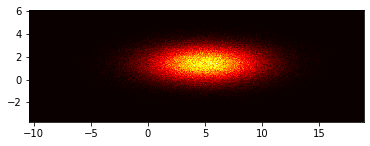

In [76]:
#set boundaries
xmin = np.min(s1[0])
xmax = np.max(s1[0])
ymin = np.min(s1[1])
ymax = np.max(s1[1])
xbin = 500
ybin = np.int(xbin*(ymax-ymin)/(xmax-xmin))
H,xedge,yedge = np.histogram2d(s1[0], s1[1], bins=[xbin,ybin], range = [[xmin,xmax],[ymin,ymax]],normed=False)
print (H.shape)
plt.imshow(H.T,cmap='hot', extent = [xmin,xmax,ymin,ymax], interpolation='nearest')
plt.show()